<a href="https://colab.research.google.com/github/SurekhaBerlin/Quantium-Data-Analysis-Project/blob/main/QuantiumRetailAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantium Retail Analytics

1. Creating and interpreting high-level summaries of the data
2. Finding outliers and removing these (if applicable)
3. Checking data formats and correcting (if applicable)

## STEP 0 : Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('/content/QVI_purchase_behaviour.csv')
customer_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
#Transactiondata is in Excel format
transaction_df = pd.read_excel('/content/QVI_transaction_data.xlsx')
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


## STEP 1: Data Understanding

In [4]:
customer_df.shape

(72637, 3)

In [5]:
transaction_df.shape

(264836, 8)

In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


## STEP 2: Data Preparation

Need to perform the following steps to clean this data.
1. Checking for duplicates and removing it
2. Checking for null values and removing it
3. Dropping irrelevant rows and columns
4. Date is in non-numeric format. As excel records the dates from the beginning of 30-Dec-1899. We create python readable date column (Date_New) using DATE column.

In [8]:
transaction_df['Date_New'] = pd.to_datetime(transaction_df['DATE'],unit='D',origin='1899-12-30')

In [9]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Date_New
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


In [10]:
# Finding the duplicates
duplicates = customer_df.duplicated().sum()
duplicates

0

In [11]:
# Finding the duplicates
duplicates = transaction_df.duplicated().sum()
duplicates

1

In [12]:
# Dropping the duplicated columns
df = transaction_df.drop_duplicates()

In [14]:
# Finding the null values in the CustomerID
customer_df.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [15]:
# Finding the null values in the CustomerID
transaction_df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
Date_New          0
dtype: int64

* There are no null values or duplicates


In [16]:
customer_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [17]:
transaction_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Date_New
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,2018-12-30 00:52:12.879215616
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,2018-07-01 00:00:00
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,2018-09-30 00:00:00
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,2018-12-30 00:00:00
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,2019-03-31 00:00:00
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019-06-30 00:00:00
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,NaN


* Finding the outlier

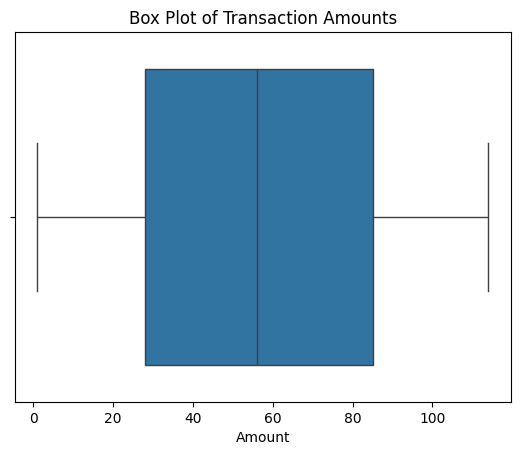

In [23]:
# Assuming your DataFrame has a column 'amount' which contains transaction amounts
sns.boxplot(x='PROD_NBR', data=transaction_df)
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

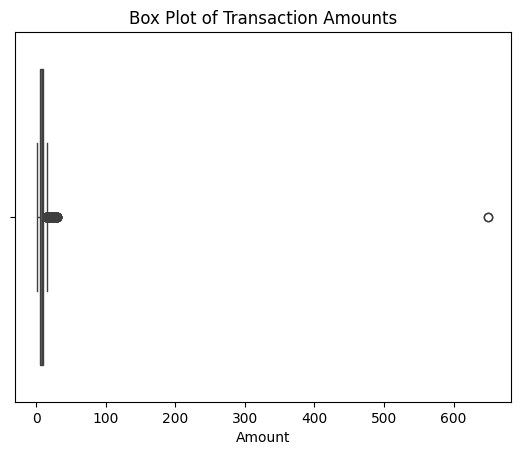

In [24]:
# Assuming your DataFrame has a column 'amount' which contains transaction amounts
sns.boxplot(x='TOT_SALES', data=transaction_df)
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Amount')
plt.show()